# SWAN IO 

This example notebook demonstrates the input and plotting of SWAN using MHKiT. In this example [SNL-SWAN](https://github.com/SNL-WaterPower/SNL-SWAN) was run to represent a wave enegery converter. The output was written out in ASCII and binary mat files. This notebook demonstrates how to import these different files into MHKiT and perfoms plotting.  First we will import the MHKiT SWAN package and the other packages needed for this example. Secondly we will create an OS indpendent path to the folder housing the SWAN data used in this example `swan_data_folder`. 

In [1]:
from mhkit.wave.io import swan
import matplotlib.pyplot as plt
from os.path import join
import pandas as pd

swan_data_folder = join('data','wave','swan')

## Supported SWAN Output Files

MHKiT currenlty supports both block and table SWAN files in ASCII or binary mat files. Detailed descriptions of these file types may be found in the [SWAN User Manual](http://swanmodel.sourceforge.net/download/zip/swanuse.pdf). In the following cells swan table and block data will be imported, discussed and plotted. Three SWAN output files will be imported an ASCII table file ('SWANOUT.DAT'), an ASCII block file ('SWANOUTBlock.DAT') and a binary block file ('SWANOUT.mat').  

In [2]:
swan_table_file = join(swan_data_folder, 'SWANOUT.DAT')
swan_block_file = join(swan_data_folder, 'SWANOUTBlock.DAT')
swan_block_mat_file = join(swan_data_folder, 'SWANOUT.mat')

## Load SWAN Files with MHKiT

To load a supported SWAN file simply call the read file for that data type (e.g. `swan.read_table` or `swan.read_block`). The function will read in the SWAN output and return the data as a DataFrame for table data or a dictionary of DataFrames for block data. The function will also return any meta data that the file may contain which will vary based the file type and options specified in the SWAN run. MHKiT requires that for block data written in ASCII format that the file was written with headers. The `swan.read_block` function will look for a `.mat` extension and if the file extension differs the function will attept to parse as ASCII block file.

In [3]:
swan_table, metadata_table = swan.read_table(swan_table_file)
swan_block, metadata_block = swan.read_block(swan_block_file)
swan_block_mat, metadata_block_mat = swan.read_block(swan_block_mat_file)

## SWAN Table Data and Metadata

The swan table input is displayed below. The DataFram columns contains a series of x-points ('Xp'), y-points ('Yp'), and keyword values at a given x,y point. The keywords are specified in the SWAN user manual and here can be seen as: 'Hsig'(significant wave height), 'Dir' (average wave direction), 'RTpeak' (Relative peak period), 'TDir' (direction of the energy transport). In the cell below the table metadata is written to screen and can be seen to be a dictionary of keywords which contains the SWAN run name, the type of table written, the version of SWAN run, the column headers and the associated units.

In [4]:
swan_table

,Xp,Yp,Hsig,Dir,RTpeak,TDir
0,0.0,0.0,1.00106,0.000,9.5726,0.000
1,10.0,0.0,1.00106,0.000,9.5726,0.000
2,20.0,0.0,1.00106,0.000,9.5726,0.000
3,30.0,0.0,1.00106,0.000,9.5726,0.000
4,40.0,0.0,1.00106,0.000,9.5726,0.000
...,...,...,...,...,...,...
10196,960.0,1000.0,1.00091,359.990,9.5726,359.991
10197,970.0,1000.0,1.00089,359.988,9.5726,359.989
10198,980.0,1000.0,1.00086,359.986,9.5726,359.987
10199,990.0,1000.0,1.00083,359.984,9.5726,359.985


In [5]:
metadata_table

{'Run': 'TEST',
 'Table': ['COMPGRID'],
 'version': '41.20',
 'header': ['Xp', 'Yp', 'Hsig', 'Dir', 'RTpeak', 'TDir'],
 'units': ['m', 'm', 'm', 'degr', 'sec', 'degr']}

## SWAN Block (ASCII) Data and Metadata

MHKiT will read in block data as a Dictionary of DataFrames for each quantity of interest in the file. Shown below it can be seen that Dictionary `swan_block` has the same 4 keys from the table example above. In the cell below the underlying DataFrame for the 'Signigicant wave height' is shown. This DataFrame has indicies and columns reffering to a point on the grid and a value of significant wave heigh at each point. In the last code block the metadata Dictionary is written to screen...

In [6]:
swan_block.keys()

dict_keys(['Significant wave height', 'Average wave direction', 'Relative peak period', 'direction of the energy transport'])

In [7]:
swan_block['Significant wave height']

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
100,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
99,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [8]:
metadata_block

,Run,Frame,vars,Unit,unitMultiplier,cols
2,TEST,COMPGRID,Significant wave height,0.1000E-01 m,0.01,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
112,TEST,COMPGRID,Average wave direction,0.1000E+00 degr,0.1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
222,TEST,COMPGRID,Relative peak period,0.1000E+00 sec,0.1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
332,TEST,COMPGRID,direction of the energy transport,0.1000E+00 degr,0.1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


## SWAN Block (.mat) Data and Metadata

The Block .mat file returns binary data in the same block format as was shown above for the ASCII block file. Looking at the first code block below it can be seen that the returned Dictionary keys are the SWAN variable names ('Hsig', 'Dir', 'RTpeak', 'TDir'). Looking at the DataFrame for the significant wave height ('Hsig') we can see that the indicies and columns are the same as the previous block ASCII DataFrame but the values now contain six decimal places. One consideration for working with binary data is shown in the last cell block of the section where there is no metadata letting the user know the units of the data. For that the user would need to return to their original SWAN input file.

In [9]:
swan_block_mat.keys()

dict_keys(['Hsig', 'Dir', 'RTpeak', 'TDir'])

In [10]:
swan_block_mat['Hsig']

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1.001056,1.001056,1.001055,1.001055,1.001055,1.001055,1.001054,1.001054,1.001054,1.001053,...,1.000756,1.000708,1.000654,1.000595,1.000529,1.000456,1.000376,1.000289,1.000195,1.000088
1,1.001056,1.001055,1.001055,1.001054,1.001054,1.001054,1.001053,1.001053,1.001052,1.001052,...,1.000698,1.000641,1.000579,1.000509,1.000432,1.000348,1.000256,1.000156,1.000047,0.999916
2,1.001056,1.001055,1.001055,1.001054,1.001054,1.001053,1.001052,1.001052,1.001051,1.001051,...,1.000615,1.000548,1.000473,1.000390,1.000299,1.000200,1.000092,0.999976,0.999850,0.999699
3,1.001056,1.001055,1.001055,1.001054,1.001054,1.001053,1.001052,1.001052,1.001051,1.001051,...,1.000515,1.000434,1.000345,1.000247,1.000140,1.000023,0.999897,0.999762,0.999616,0.999444
4,1.001056,1.001055,1.001055,1.001054,1.001054,1.001053,1.001052,1.001052,1.001051,1.001050,...,1.000392,1.000295,1.000189,1.000073,0.999947,0.999811,0.999665,0.999508,0.999340,0.999143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.001056,1.001055,1.001055,1.001054,1.001054,1.001053,1.001052,1.001052,1.001051,1.001050,...,1.000917,1.000893,1.000865,1.000833,1.000795,1.000752,1.000703,1.000648,1.000586,1.000506
97,1.001056,1.001055,1.001055,1.001054,1.001054,1.001053,1.001052,1.001052,1.001051,1.001051,...,1.000941,1.000921,1.000899,1.000872,1.000841,1.000806,1.000765,1.000720,1.000668,1.000599
98,1.001056,1.001055,1.001055,1.001054,1.001054,1.001053,1.001052,1.001052,1.001051,1.001051,...,1.000960,1.000945,1.000926,1.000905,1.000879,1.000850,1.000817,1.000779,1.000735,1.000678
99,1.001056,1.001055,1.001055,1.001054,1.001054,1.001053,1.001053,1.001052,1.001052,1.001052,...,1.000976,1.000964,1.000949,1.000931,1.000911,1.000887,1.000859,1.000827,1.000791,1.000743


In [11]:
metadata_block_mat

{'filetype': 'mat', 'variables': ['Hsig', 'Dir', 'RTpeak', 'TDir']}

## Block to Table

MHKiT provides the ability to convert SWAN block Dictionaries to table DataFrame format allowing for easy data manipulation across multiple data types as the function converts each key to a column in a single DataFrame.

In [19]:
swan_block_as_table = swan.dictionary_of_block_to_table(swan_block)
swan_block_mat_as_table = swan.dictionary_of_block_to_table(swan_block_mat)
swan_block_as_table

,x,y,Significant wave height,Average wave direction,Relative peak period,direction of the energy transport
0,0,100,1.0,0.0,9.6,0.0
1,0,99,1.0,0.0,9.6,0.0
2,0,98,1.0,0.0,9.6,0.0
3,0,97,1.0,0.0,9.6,0.0
4,0,96,1.0,0.0,9.6,0.0
...,...,...,...,...,...,...
10196,100,4,1.0,0.1,9.6,0.1
10197,100,3,1.0,0.1,9.6,0.1
10198,100,2,1.0,0.1,9.6,0.1
10199,100,1,1.0,0.1,9.6,0.1


## Example Plots from SWAN Data

This last section shows a couple of plots for the significant wave height using each of the imported results.

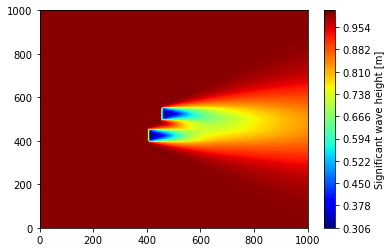

In [27]:
plt.figure()
plt.tricontourf(swan_table.Xp, swan_table.Yp, 
                    swan_table.Hsig, levels=256, cmap='jet')
cbar = plt.colorbar()
cbar.set_label('Significant wave height [m]')

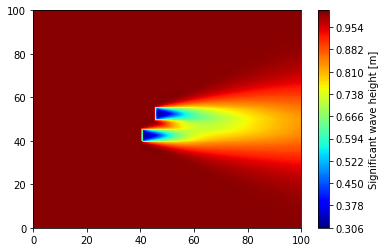

In [28]:
plt.figure()
plt.tricontourf(swan_block_mat_as_table.x, swan_block_mat_as_table.y, 
                    swan_block_mat_as_table.Hsig, levels=256, cmap='jet')
cbar = plt.colorbar()
cbar.set_label('Significant wave height [m]')

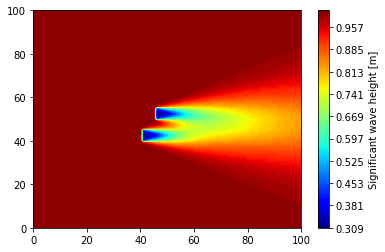

In [29]:
plt.figure()
plt.tricontourf(swan_block_as_table.x, swan_block_as_table.y, 
                    swan_block_as_table['Significant wave height'], levels=256, cmap='jet')
cbar = plt.colorbar()
cbar.set_label('Significant wave height [m]')